In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib as mp
from matplotlib import cm

In [2]:
df = pd.read_csv("Classifier_inputs.csv", engine='c')
df2 = pd.read_csv("targets.csv")

In [3]:
df.head()

,Unnamed: 0,loc_desc,Arrest,Domestic,Beat,District,Ward,area,FBI,Year,Longitude,Latitude
0,0,17,1,1,1022,10.0,24.0,29.0,10,2016,-87.706819,41.864073
1,1,109,0,1,313,3.0,20.0,42.0,10,2016,-87.604363,41.782922
2,2,125,0,0,1524,15.0,37.0,25.0,24,2016,-87.758372,41.894908
3,3,121,0,0,1532,15.0,28.0,25.0,10,2016,-87.749516,41.885687
4,4,109,0,1,1523,15.0,28.0,25.0,7,2016,-87.761751,41.886297


In [4]:
df2.head()

,Unnamed: 0,Primary Type
0,0,BATTERY
1,1,BATTERY
2,2,PUBLIC PEACE VIOLATION
3,3,BATTERY
4,4,THEFT


In [5]:
working_df = pd.DataFrame()
working_df['ward'] = df['Ward']
working_df['type'] = df2['Primary Type']

In [6]:
working_df.isnull().sum()
working_df.head()

,ward,type
0,24.0,BATTERY
1,20.0,BATTERY
2,37.0,PUBLIC PEACE VIOLATION
3,28.0,BATTERY
4,28.0,THEFT


In [7]:
features = ['ward','type']
temp = (working_df).groupby(features).aggregate({"type":['count']})
temp.head()

type
                         count
ward type                     
1.0  ARSON                  38
     ASSAULT              1104
     BATTERY              3219
     BURGLARY             2080
     CRIM SEXUAL ASSAULT    85

In [8]:
temp = temp.reset_index()
temp.columns = ['Ward', 'Type', 'count']
temp.head(1)

,Ward,Type,count
0,1.0,ARSON,38


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

viridis = cm.get_cmap('viridis', 256)

In [10]:
c = viridis(np.linspace(0, 1, 100))



In [11]:
temp.head()

,Ward,Type,count
0,1.0,ARSON,38
1,1.0,ASSAULT,1104
2,1.0,BATTERY,3219
3,1.0,BURGLARY,2080
4,1.0,CRIM SEXUAL ASSAULT,85


In [12]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

le.fit(temp['Type'])
temp['type_num'] = le.transform(temp['Type'])

In [13]:
temp

,Ward,Type,count,type_num
0,1.0,ARSON,38,0
1,1.0,ASSAULT,1104,1
2,1.0,BATTERY,3219,2
3,1.0,BURGLARY,2080,3
4,1.0,CRIM SEXUAL ASSAULT,85,5
...,...,...,...,...
1436,50.0,ROBBERY,519,28
1437,50.0,SEX OFFENSE,52,29
1438,50.0,STALKING,7,30
1439,50.0,THEFT,3590,31


In [14]:
features = ['Ward','type_num','count']
t = temp[features]

In [15]:
temp[features].groupby(['Ward','type_num']).head()

,Ward,type_num,count
0,1.0,0,38
1,1.0,1,1104
2,1.0,2,3219
3,1.0,3,2080
4,1.0,5,85
...,...,...,...
1436,50.0,28,519
1437,50.0,29,52
1438,50.0,30,7
1439,50.0,31,3590


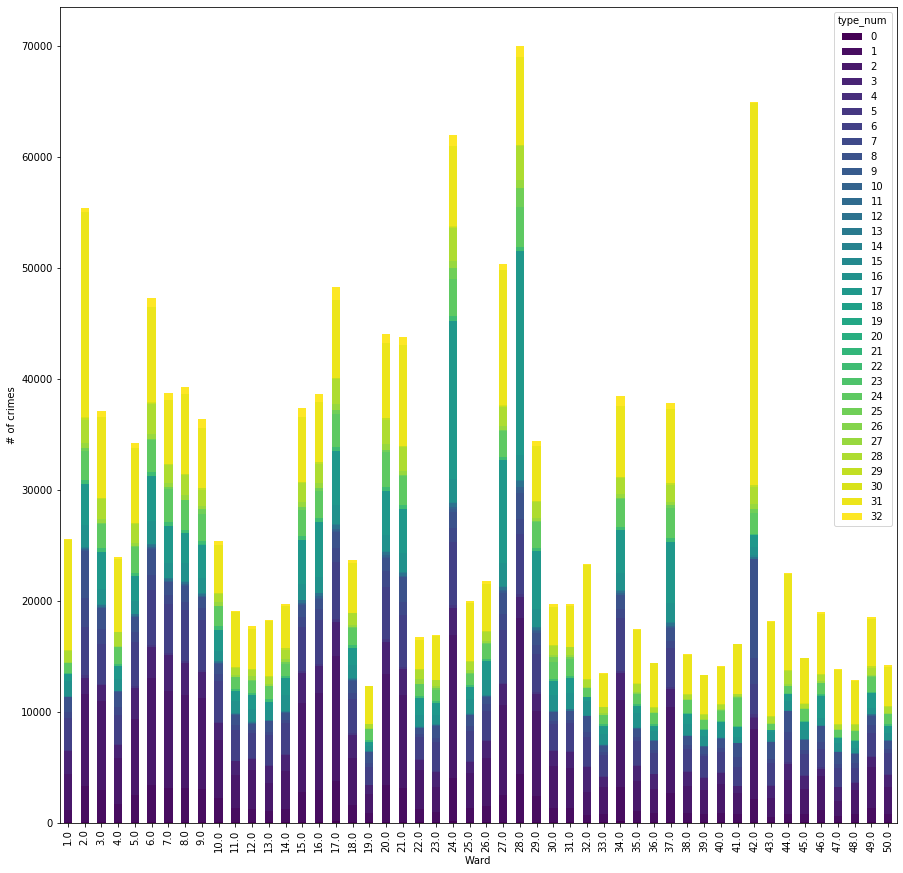

In [16]:


ax = pd.pivot_table(t, index = 'Ward', columns = 'type_num', values = 'count') \
.plot(kind = 'bar',stacked = True, figsize = (15,15), cmap = viridis)

ax.set_ylabel("# of crimes")
ax.figure.savefig('CrimesPerWard.png')

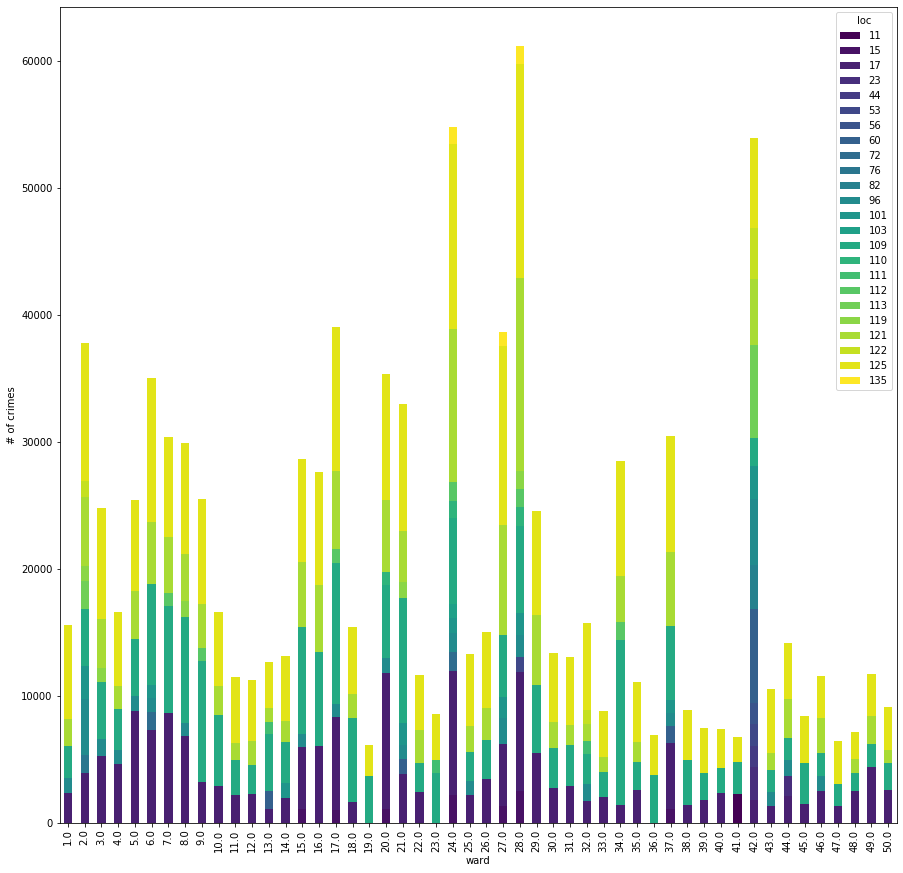

In [17]:
working_df = pd.DataFrame()
working_df['ward'] = df['Ward']
working_df['loc'] = df['loc_desc']

features = ['ward','loc']
temp = (working_df).groupby(features).aggregate({"loc":['count']})
temp = temp.reset_index()
temp.columns = ['ward', 'loc', 'count']

temp = temp[temp['count'] > 1000]

colormap = mp.cm.nipy_spectral #I suggest to use nipy_spectral, Set1,Paired
n = temp['loc'].nunique()
c = [colormap(i) for i in np.linspace(0, 1,n)]

ax = pd.pivot_table(temp, index = 'ward', columns = 'loc', values = 'count') \
.plot(kind = 'bar',stacked = True, figsize = (15,15), cmap = viridis)

ax.set_ylabel("# of crimes")
ax.figure.savefig('CrimeLocationsPerWard.png')

In [18]:
df = df.drop(['Unnamed: 0'], axis=1)
df.head()

,loc_desc,Arrest,Domestic,Beat,District,Ward,area,FBI,Year,Longitude,Latitude
0,17,1,1,1022,10.0,24.0,29.0,10,2016,-87.706819,41.864073
1,109,0,1,313,3.0,20.0,42.0,10,2016,-87.604363,41.782922
2,125,0,0,1524,15.0,37.0,25.0,24,2016,-87.758372,41.894908
3,121,0,0,1532,15.0,28.0,25.0,10,2016,-87.749516,41.885687
4,109,0,1,1523,15.0,28.0,25.0,7,2016,-87.761751,41.886297


In [19]:
eda = ['loc_desc', 'Beat', 'District', 'Ward', 'area', 'FBI']
df_eda = df[eda]
# sb.pairplot(df_eda)


In [20]:
days = ['Monday','Tuesday','Wednesday',  'Thursday', 'Friday', 'Saturday', 'Sunday']
df.groupby([df.index.dayofweek]).size().plot(kind='bar')
plt.xlabel('Days of the week')
plt.xticks(np.arange(7), days)
plt.ylabel('Number of crimes')
plt.title('Number of crimes by day of the week')
plt.show()

AttributeError: 'RangeIndex' object has no attribute 'dayofweek'